# Informations du dataset

Source du dataset : https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset/data

Problématique : Quel est le profil d'élève qui réussissent le mieux dans leurs études?

Les informations du dataset importantes :


* `Department` :  Filière
* `Attendance (%)` : Taux de présence (%)
* `Midterm_Score` : Note de mi-semestre/ partiel
* `Final_Score` : Note finale
* `Assignments_Avg` : Moyenne des devoirs  
* `Quizzes_Avg` : Moyenne des quiz
* `Participation_Score` : Note de participation
* `Projetcts_Score` : Note de projets
* `Total_Score` : Note totale  
* `Grade` : Mention/Note finale (lettre)  
* `Study_Hours_per_Week : Heures` d'étude par semaine  
* `Extracurricular_Activities` : Activités Extrascolaires  
* `Internet_Access_at_Home` : Accès Internet à la maison  
* `Parent_Education_Level` : Niveau d'études des parents  
* `Family_Income_Level` : Niveau de revenu Familial  
* `Stress_Level (1-10)` : Niveau de stress (de 1 à 10)  
* `Sleep_Hours_per_Night` : Heures de sommeil par nuit  







# Importation des bibliothèques

*   On importe les bibliothèques `pandas`, `numpy`, `matplotlib`, `pyplot`, et `seaborn`.

* On importe les fichiers `csv`, on récupère ici les fichiers `performance.csv` et `grading.csv` puis on affiche les cinqs premières lignes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Lecture du fichier csv

In [ ]:
df= pd.read_csv("performance.csv")
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


# Nettoyage du DataFrame

## Suppression des colonnes inutiles et vérification des valeurs nulles


On commence par supprimer les colonnes qui ne nous servirons pas pour le modèle.

On vérifie ensuite qu'il n'y à pas de valeurs nul dans le dataframe.

In [ ]:
supprimer = ['First_Name', 'Last_Name', 'Email', 'Student_ID']
df.drop(columns=supprimer, inplace=True, errors='ignore')

print(df.columns)

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


In [ ]:
df.dropna()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Female,22,CS,50.82,53.45,98.33,61.35,55.99,74.1,55.27,67.6875,D,23.0,No,Yes,PhD,Low,6,7.1
4994,Female,19,Mathematics,62.57,58.18,42.62,56.41,71.89,22.0,85.15,61.6775,D,27.2,No,No,Bachelor's,Medium,9,7.3
4995,Male,19,CS,96.09,45.86,45.63,74.13,81.53,9.8,51.66,53.5470,F,7.8,No,No,Master's,Medium,10,4.5
4998,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,62.9,84.74,68.6585,D,14.5,Yes,No,PhD,Medium,10,5.9


In [ ]:
## Vérification deu bon des nettoyaged des colonnes

df.isnull().values.any()
df.isnull().sum()


,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0


# Graphique sur tous les élèves

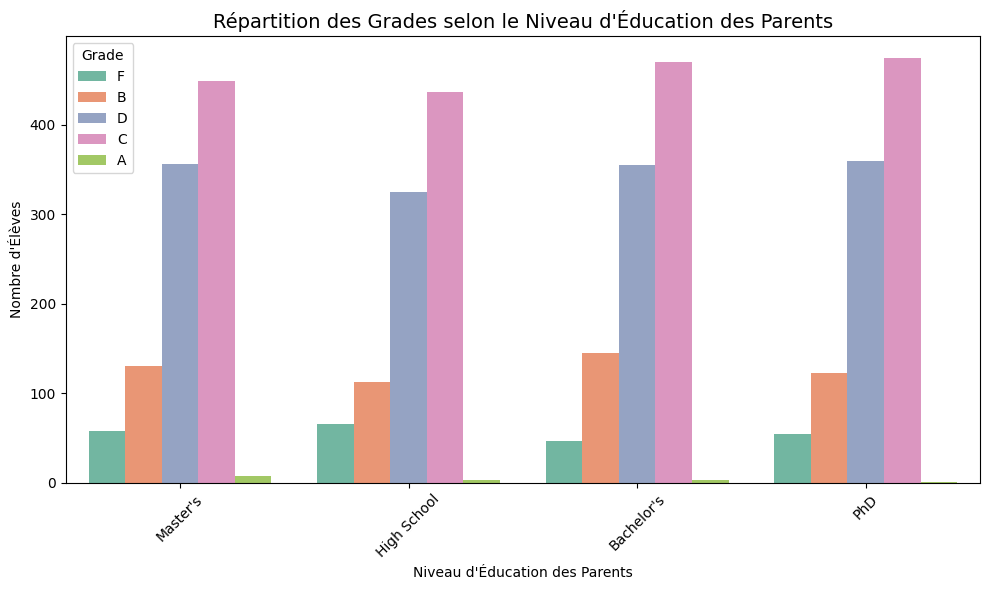

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parent_Education_Level', hue='Grade', palette='Set2')
plt.title("Répartition des Grades selon le Niveau d'Éducation des Parents", fontsize=14)
plt.xlabel("Niveau d'Éducation des Parents")
plt.ylabel("Nombre d'Élèves")
plt.xticks(rotation=45)
plt.legend(title="Grade")
plt.tight_layout()
plt.show()

<ipython-input-8-1100049079>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


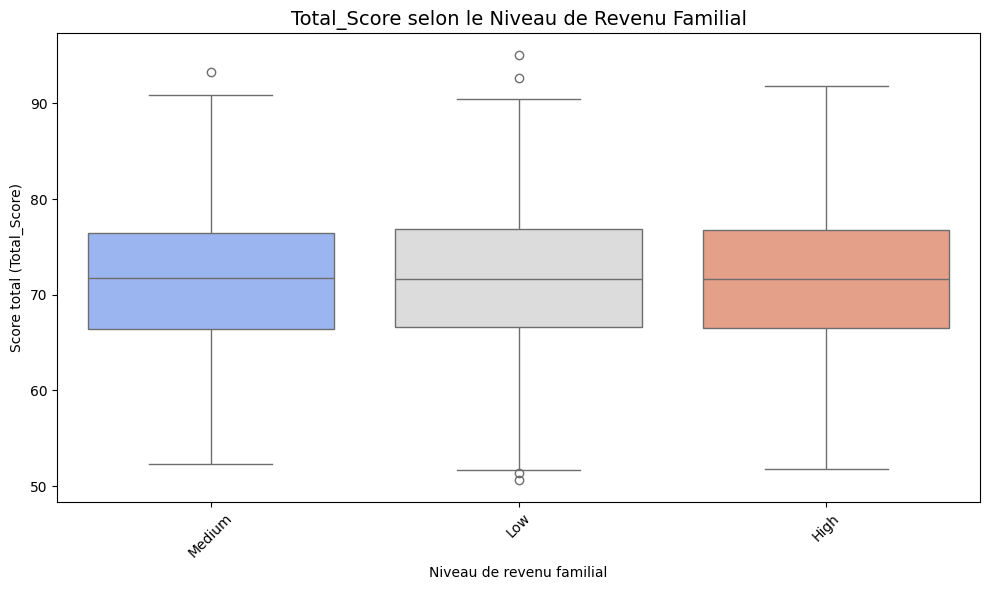

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Family_Income_Level',
    y='Total_Score',
    palette='coolwarm'
)

# Titres et axes
plt.title("Total_Score selon le Niveau de Revenu Familial", fontsize=14)
plt.xlabel("Niveau de revenu familial")
plt.ylabel("Score total (Total_Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique uniquement sur les élèves ayant obtenu A

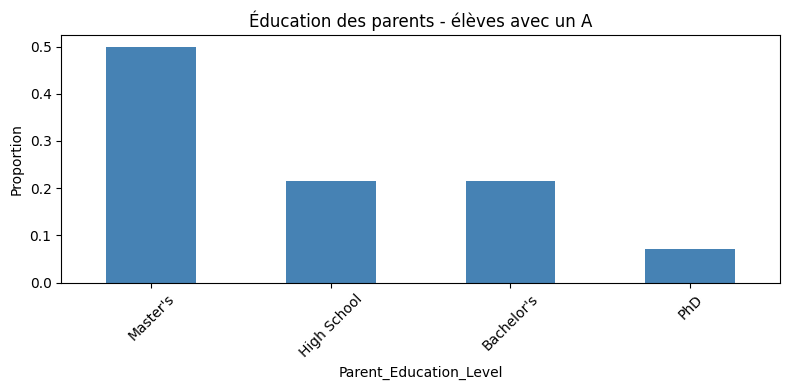

In [ ]:
df_A = df[df['Grade'] == 'A']

plt.figure(figsize=(8,4))
df_A['Parent_Education_Level'].value_counts(normalize=True).plot(
    kind='bar', color='steelblue'
)
plt.title("Éducation des parents - élèves avec un A")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

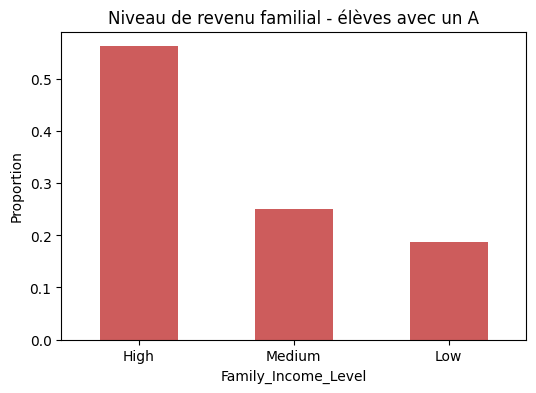

In [ ]:
df_A = df[df['Grade'] == 'A']

plt.figure(figsize=(6,4))
df_A['Family_Income_Level'].value_counts(normalize=True).plot(
    kind='bar', color='indianred'
)
plt.title("Niveau de revenu familial - élèves avec un A")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()


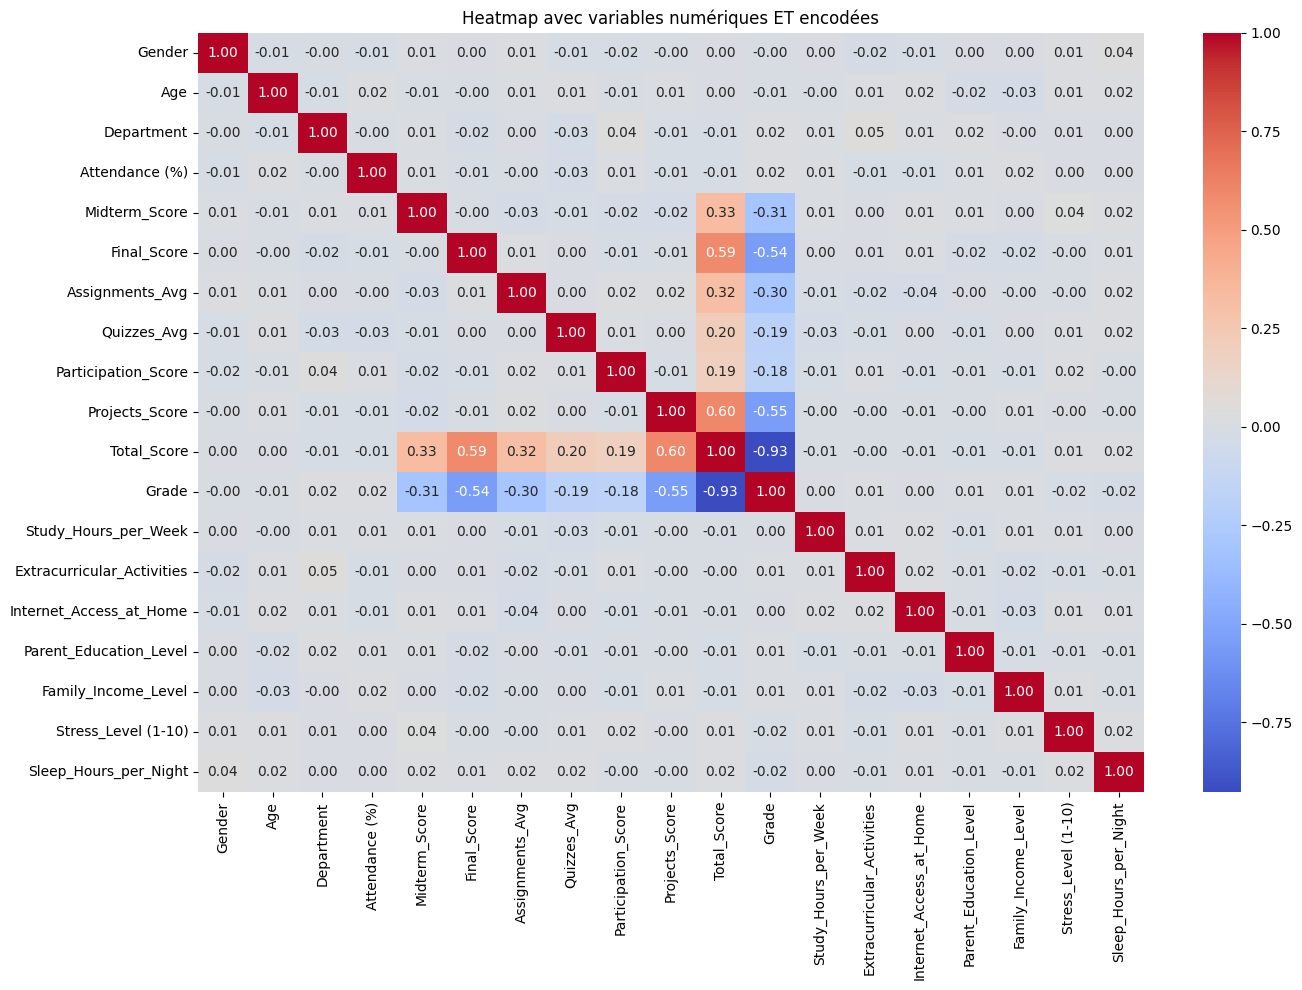

In [ ]:
df_encode = df.copy()

for col in df.select_dtypes(include='object').columns:
    df_encode[col] = LabelEncoder().fit_transform(df[col].astype(str))

correlation_matrix = df_encode.corr()

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap avec variables numériques ET encodées")
plt.tight_layout()
plt.show()


# Création du modèle

Chargement des données et entrainement du modèle

In [ ]:
# Définir les variables explicatives (features) et la cible (target)
features = [
    "Study_Hours_per_Week",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night",
    "Attendance (%)",
    "Internet_Access_at_Home",
    "Extracurricular_Activities",
    "Parent_Education_Level",
    "Family_Income_Level"
]
target = "Total_Score"

X = df[features]
y = df[target]

# Identifier les colonnes numériques et catégorielles
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

# Créer le pipeline de prétraitement + modèle
preprocessor = ColumnTransformer(transformers=[
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(), cat_features)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R² :", r2)


RMSE : 7.317128001437462
R² : -0.0007842688371568762


In [ ]:


# Évaluer le modèle avec 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print("R² moyen (validation croisée) :", cv_scores.mean())


R² moyen (validation croisée) : -0.0052215041909211115


# Prédiction avec un nouvel élève

In [ ]:
# Exemple d'un nouvel élève
nouvel_eleve = pd.DataFrame([{
    "Study_Hours_per_Week": 10,
    "Stress_Level (1-10)": 4,
    "Sleep_Hours_per_Night": 7,
    "Attendance (%)": 92,
    "Internet_Access_at_Home": "Yes",
    "Extracurricular_Activities": "Yes",
    "Parent_Education_Level": "Bachelor's",
    "Family_Income_Level": "Medium"
}])

# Prédiction
prediction = pipeline.predict(nouvel_eleve)
print("Score prédit pour le nouvel élève :", prediction[0])


Score prédit pour le nouvel élève : 71.7291461925288


In [66]:
# Prédiction du student Omar Williams
nouvel_eleve = pd.DataFrame([{
    "Study_Hours_per_Week": 2,
    "Stress_Level (1-10)": 10,
    "Sleep_Hours_per_Night": 8,
    "Attendance (%)": 97.36,
    "Internet_Access_at_Home": "Yes",
    "Extracurricular_Activities": "Yes",
    "Parent_Education_Level": "High School",
    "Family_Income_Level": "Medium"
}])
prediction = pipeline.predict(nouvel_eleve)
print("Score prédit pour S1000 :", prediction[0])


Score prédit pour S1000 : 71.5521729271464
